# ML class final project part1
##  Almog Shor
## Yehudit Brickner

imports

In [1]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import time
import pickle
from collections import Counter

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

create the data set with all of the features

In [2]:
def create_df1(folder):

    folder_dir= os.listdir(folder)
    sphere_balls=['basketball','baseball','football','volley_ball'] # change to the balls u want...
    non_sphere_balls=['american_football','shuttlecock','rugby','hockey_puck'] # change to the balls u want...
    big_list=[]
    my_list=[]
    count=0
    c=0
    for i in folder_dir:
        print(i)
        j = os.listdir(folder+"/"+i)
        if i in sphere_balls or i in non_sphere_balls:
            for k in range(len(j)):
                try:
                    img = cv2.imread(folder+"/"+i+"/"+j[k], cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img,(200,200), interpolation = cv2.INTER_AREA)
                    
                    histogram_r, bin_edges = np.histogram(img[:, :, 0], bins=256, range=(0, 256)) 
                    histogram_g, bin_edges = np.histogram(img[:, :, 1], bins=256, range=(0, 256)) 
                    histogram_b, bin_edges = np.histogram(img[:, :, 2], bins=256, range=(0, 256)) 
                    
                    dst = cv2.Canny(img, 50, 200, None, 3)
                    dst1 = cv2.Canny(img, 50, 200, None, 3)
                    lines = cv2.HoughLines(dst1, 1, np.pi / 180, 50, None, 0, 0)
                    
                    gray = cv2.imread(folder+"/"+i+"/"+j[k],cv2.IMREAD_GRAYSCALE)
                    gray =  cv2.resize(gray,(200,200), interpolation = cv2.INTER_AREA)
                    gray = cv2.medianBlur(gray, 5)
                    rows = gray.shape[0]
                    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                                    param1=100, param2=30,
                                    minRadius=10, maxRadius=100)
                    
                    my_list=[]
                    my_list.append(folder+"/"+i+"/"+j[k])
                    my_list.append(i)
                    my_list.append(c)
                    if i in sphere_balls:
                        my_list.append(0) # ball is sphere
                    elif i in non_sphere_balls:
                        my_list.append(1) # ball is non sphere
                    else:
                        my_list.append(-1) # not in either list - shoudnt get here
                    if lines is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(len(lines))
                    if circles is None:
                        my_list.append(0)
                        my_list.append(0)   
                    else:
                        my_list.append(1)
                        my_list.append(circles.shape[1])
                    
                    my_list.extend(histogram_r)
                    my_list.extend(histogram_g)
                    my_list.extend(histogram_b)
                    my_list.extend(img.flatten())
                    my_list.extend(dst.flatten())

                    big_list.append(my_list)
                    count+=1
                    
                except:
                    print("there was an error with count ",count)

        c+=1

    
    print("creating df")
    cols = ['path','class_name','class_number','type','lines?','#lines','circles?','#circles']
    for h in range(256):
        cols.append("r"+str(h))
    for h in range(256):
        cols.append("g"+str(h))
    for h in range(256):
        cols.append("b"+str(h))
    for h in range(200*200*3):
        cols.append("i"+str(h))
    for h in range(200*200):
        cols.append("e"+str(h))

    df = pd.DataFrame(big_list, columns = cols) 

    print("created df")
              
    return df

In [3]:
# folder ="C:/Users/nechd/Downloads/ball_classification/train"
# start_time = time.time()
# full_ball_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)

In [4]:
# full_ball_df.shape
# full_ball_df.head()

In [5]:
# full_ball_df.to_csv('sphere_nonsphere_full.csv', index=False)

In [6]:
# folder ="C:/Users/nechd/Downloads/ball_classification/test"
# start_time = time.time()
# full_test_df = create_df1(folder) 
# end_time = time.time()
# print("time taken: ",end_time - start_time)


In [7]:
# full_test_df.to_csv('final_test_data_sphere_nonsphere_full.csv', index=False)

import the data with some/all features

In [8]:
data = pd.read_csv('sphere_nonsphere_full.csv')
del data['path']
del data['class_name']
del data['class_number']
# ball_type = [0,2,9,11]
# small_hist_4balls = data.loc[data['class_number'].isin(ball_type)]
# small_hist_4balls.shape

In [9]:
data.head()

,type,lines?,#lines,circles?,#circles,r0,r1,r2,r3,r4,...,e39990,e39991,e39992,e39993,e39994,e39995,e39996,e39997,e39998,e39999
0,1,1,36,1,5,2,3,9,16,12,...,0,0,0,0,0,0,0,0,0,0
1,1,1,207,1,6,2,4,28,29,60,...,0,0,0,0,0,0,0,0,0,0
2,1,1,55,1,5,0,0,2,6,13,...,0,0,0,0,0,0,0,0,0,0
3,1,1,196,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,291,1,12,4529,4546,1537,812,577,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data = pd.read_csv('final_test_data_sphere_nonsphere_full.csv')
del test_data['path']
del test_data['class_name']
del test_data['class_number']
final_test_y = test_data['type']
# print(final_test_y)
final_test_X = test_data.drop(['type'], axis=1)

In [11]:
test_data.head()

,type,lines?,#lines,circles?,#circles,r0,r1,r2,r3,r4,...,e39990,e39991,e39992,e39993,e39994,e39995,e39996,e39997,e39998,e39999
0,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,759,1,8,182,184,170,223,353,...,0,0,0,255,0,0,0,0,0,0
2,1,1,445,1,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,27,1,2,1,10,12,31,31,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X1 = data.iloc[:, 1:5] # small
X2 = data.iloc[:, 5:5+256*3]  # hist
X3 = data.iloc[:, 5+256*3:5+256*3+200*200*3]
X4 = data.iloc[:, 5+256*3+200*200*3:]
X5 = data.drop(['type'], axis=1)
y = data['type']

In [13]:
X1.head()

,lines?,#lines,circles?,#circles
0,1,36,1,5
1,1,207,1,6
2,1,55,1,5
3,1,196,1,1
4,1,291,1,12


In [14]:
X2.head()

,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b246,b247,b248,b249,b250,b251,b252,b253,b254,b255
0,2,3,9,16,12,17,25,29,32,36,...,184,182,211,246,339,425,438,605,964,16964
1,2,4,28,29,60,54,112,77,139,153,...,115,77,135,98,192,162,305,285,359,14412
2,0,0,2,6,13,24,67,100,180,175,...,4,5,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,28,28,28,35,84,113,233,241,515,19743
4,4529,4546,1537,812,577,463,427,362,255,238,...,126,128,122,123,139,135,161,168,184,130


In [15]:
X3.head()

,i0,i1,i2,i3,i4,i5,i6,i7,i8,i9,...,i119990,i119991,i119992,i119993,i119994,i119995,i119996,i119997,i119998,i119999
0,255,255,255,255,255,255,255,255,255,255,...,246,246,244,247,245,244,246,251,250,252
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,44,44,44,44,44,44,44,44,44,47,...,51,22,31,51,9,20,36,6,17,30
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,183,175,162,179,171,158,180,172,159,185,...,166,173,165,152,160,152,139,152,144,131


In [16]:
X4.head()

,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,...,e39990,e39991,e39992,e39993,e39994,e39995,e39996,e39997,e39998,e39999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X5.head()

,lines?,#lines,circles?,#circles,r0,r1,r2,r3,r4,r5,...,e39990,e39991,e39992,e39993,e39994,e39995,e39996,e39997,e39998,e39999
0,1,36,1,5,2,3,9,16,12,17,...,0,0,0,0,0,0,0,0,0,0
1,1,207,1,6,2,4,28,29,60,54,...,0,0,0,0,0,0,0,0,0,0
2,1,55,1,5,0,0,2,6,13,24,...,0,0,0,0,0,0,0,0,0,0
3,1,196,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,291,1,12,4529,4546,1537,812,577,463,...,0,0,0,0,0,0,0,0,0,0


train test split

In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.3, random_state=42)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.3, random_state=42)

extra functions

In [19]:
# function to represent the confusion matrix nicely
def Confusion_Matrix(cf_matrix):
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Greens')

In [20]:
# list to hold all final results
results=[]

imports

In [21]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


from sklearn.decomposition import PCA

# RUN ON DATA SET WITH LINES AND CIRCLES 

#### SVM

In [22]:
# losses = ["hinge","squared_hinge"]
# penalties = ["l1","l2"]

# print("OneVsOneClassifier")
# for i in losses:
#     for j in penalties:
#         try:
#             svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train1, y_train1)
#             pred_svm = svm.predict(X_test1)
#             print(i,j,round(np.sum([y_test1==pred_svm])/len(y_test1),4)*100,"%")
#         except:
#             pass

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       402
           1       0.63      0.41      0.49       358

    accuracy                           0.61       760
   macro avg       0.61      0.60      0.59       760
weighted avg       0.61      0.61      0.59       760

60.660000000000004 %


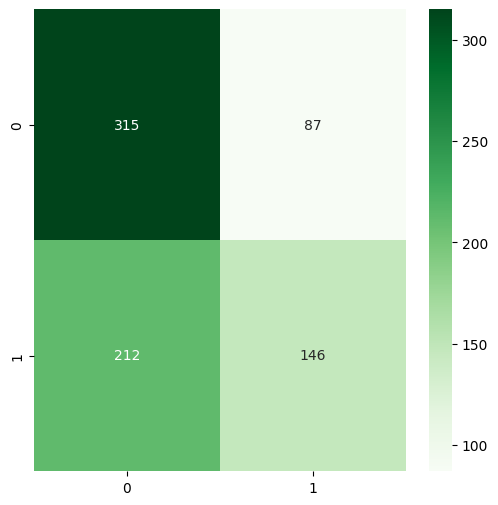

In [23]:
svm1 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train1, y_train1)
pred_svm1 = svm1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_svm1))
print(classification_report(y_test1, pred_svm1))
print(round(np.sum([y_test1==pred_svm1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'SVM',round(np.sum([y_test1==pred_svm1])/len(y_test1),4)*100 ])

#### KNN

In [24]:
# for i in range(1,51):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     neigh.fit(X_train1,y_train1)
#     pred_knn = neigh.predict(X_test1)
#     print(i,round(np.sum([y_test1==pred_knn])/len(y_test1),4)*100,"%")

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       402
           1       0.62      0.53      0.57       358

    accuracy                           0.62       760
   macro avg       0.62      0.62      0.62       760
weighted avg       0.62      0.62      0.62       760

62.239999999999995 %


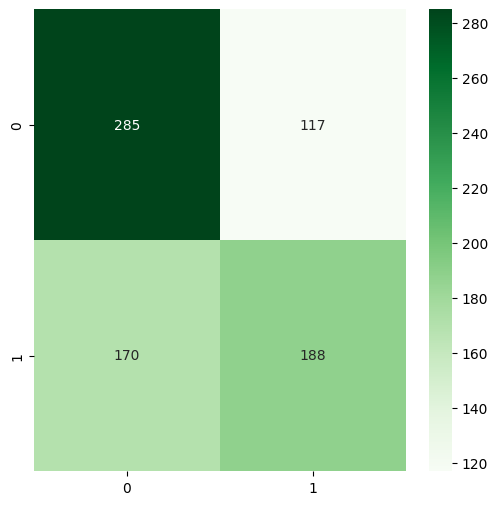

In [25]:
neigh1 = KNeighborsClassifier(n_neighbors=9)
neigh1.fit(X_train1,y_train1)
pred_knn1 = neigh1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_knn1))
print(classification_report(y_test1, pred_knn1))
print(round(np.sum([y_test1==pred_knn1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'KNN',round(np.sum([y_test1==pred_knn1])/len(y_test1),4)*100 ])

#### Adaboost

In [26]:
# for i in range(50,2001,50):
#     ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
#     ada.fit(X_train1,y_train1)
#     pred_ada = ada.predict(X_test1)
#     print(i,round(np.sum([y_test1==pred_ada])/len(y_test1),4)*100,"%")

              precision    recall  f1-score   support

           0       0.64      0.71      0.68       402
           1       0.63      0.56      0.59       358

    accuracy                           0.64       760
   macro avg       0.64      0.64      0.64       760
weighted avg       0.64      0.64      0.64       760

63.949999999999996 %


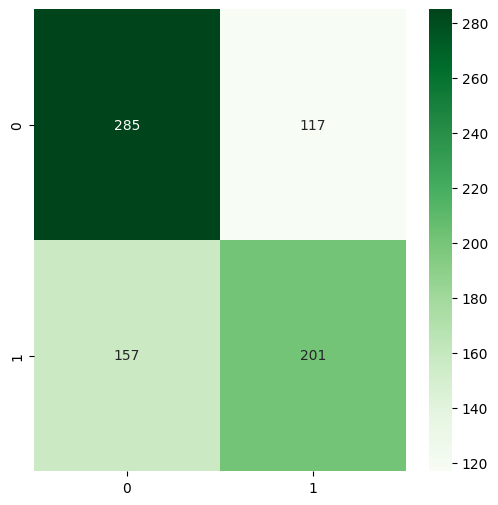

In [27]:
ada1 = AdaBoostClassifier(n_estimators=50, algorithm="SAMME",random_state=0)
ada1.fit(X_train1,y_train1)
pred_ada1 = ada1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_ada1))
print(classification_report(y_test1, pred_ada1))
print(round(np.sum([y_test1==pred_ada1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Adaboost',round(np.sum([y_test1==pred_ada1])/len(y_test1),4)*100 ])

#### Random Forest

In [28]:
# for i in range(40,501,20):
#     for j in range(2,5):
#         RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
#         RF.fit(X_train1,y_train1)
#         pred_RF = RF.predict(X_test1)
#         print(i,j,round(np.sum([y_test1==pred_RF])/len(y_test1),4)*100,"%")

              precision    recall  f1-score   support

           0       0.62      0.66      0.64       402
           1       0.59      0.54      0.56       358

    accuracy                           0.60       760
   macro avg       0.60      0.60      0.60       760
weighted avg       0.60      0.60      0.60       760

60.39 %


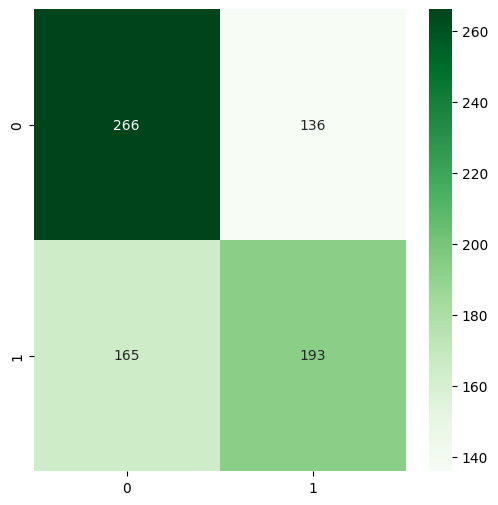

In [29]:
RF1 = RandomForestClassifier(n_estimators=240, max_depth=None,min_samples_split=4, random_state=0)
RF1.fit(X_train1,y_train1)
pred_RF1 = RF1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_RF1))
print(classification_report(y_test1, pred_RF1))
print(round(np.sum([y_test1==pred_RF1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Random Forest',round(np.sum([y_test1==pred_RF1])/len(y_test1),4)*100 ])

#### Logistic Regression

In [30]:
# penilties = ["l1","l2","elasticnet"]
# solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
# tols= [0.1 ,0.01, 0.001]

# for i in penilties:
#     for j in solvers:
#         for k in tols:
#             try:
#                 LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
#                 LR.fit(X_train1,y_train1)
#                 pred_LR = LR.predict(X_test1)
#                 print(i,j,k,round(np.sum([y_test1==pred_LR])/len(y_test1),4)*100,"%")
#             except:
#                 pass
        

              precision    recall  f1-score   support

           0       0.62      0.82      0.70       402
           1       0.68      0.43      0.52       358

    accuracy                           0.64       760
   macro avg       0.65      0.62      0.61       760
weighted avg       0.65      0.64      0.62       760

63.55 %


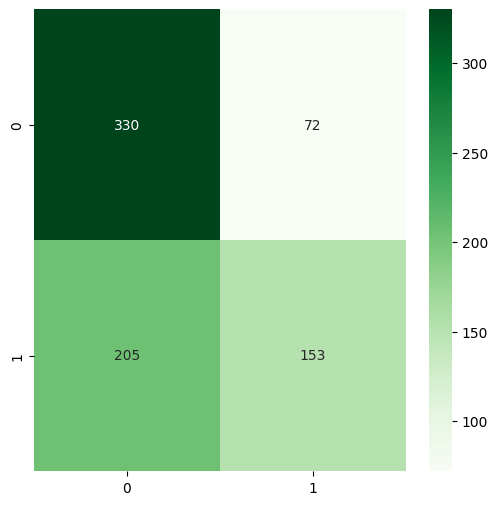

In [31]:
LR1 = LogisticRegression(penalty="l2", solver="lbfgs", tol=0.1, max_iter=10000, random_state=0)
LR1.fit(X_train1,y_train1)
pred_LR1 = LR1.predict(X_test1)
Confusion_Matrix(confusion_matrix(y_test1,pred_LR1))
print(classification_report(y_test1, pred_LR1))
print(round(np.sum([y_test1==pred_LR1])/len(y_test1),4)*100,"%")
results.append(['lines and circles', 'Logistic Regression',round(np.sum([y_test1==pred_LR1])/len(y_test1),4)*100 ])

# RUN ON DATA SET WITH HISTOGRAM DATA

#### SVM

In [32]:
# losses = ["hinge","squared_hinge"]
# penalties = ["l1","l2"]

# print("OneVsOneClassifier")
# for i in losses:
#     for j in penalties:
#         try:
#             svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train2, y_train2)
#             pred_svm = svm.predict(X_test2)
#             print(i,j,round(np.sum([y_test2==pred_svm])/len(y_test2),4)*100,"%")
#         except:
#             pass


              precision    recall  f1-score   support

           0       0.62      0.49      0.55       402
           1       0.54      0.66      0.59       358

    accuracy                           0.57       760
   macro avg       0.58      0.57      0.57       760
weighted avg       0.58      0.57      0.57       760

56.97 %


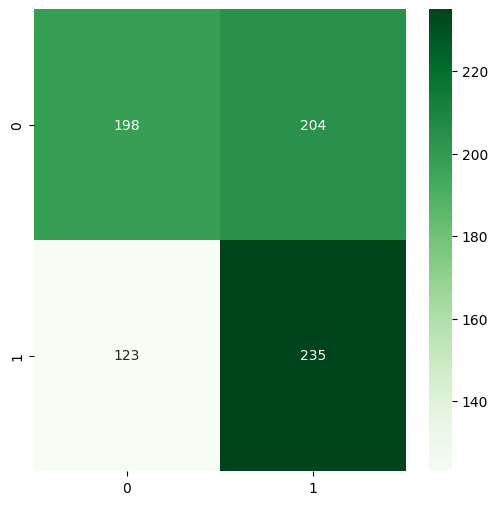

In [33]:
svm2 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train2, y_train2)
pred_svm2 = svm2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_svm2))
print(classification_report(y_test2, pred_svm2))
print(round(np.sum([y_test2==pred_svm2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'SVM',round(np.sum([y_test2==pred_svm2])/len(y_test2),4)*100 ])

#### KNN

In [34]:
# for i in range(1,51):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     neigh.fit(X_train2,y_train2)
#     pred_knn = neigh.predict(X_test2)
#     print(i,round(np.sum([y_test2==pred_knn])/len(y_test2),4)*100,"%")

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       402
           1       0.65      0.59      0.62       358

    accuracy                           0.66       760
   macro avg       0.66      0.66      0.66       760
weighted avg       0.66      0.66      0.66       760

66.05 %


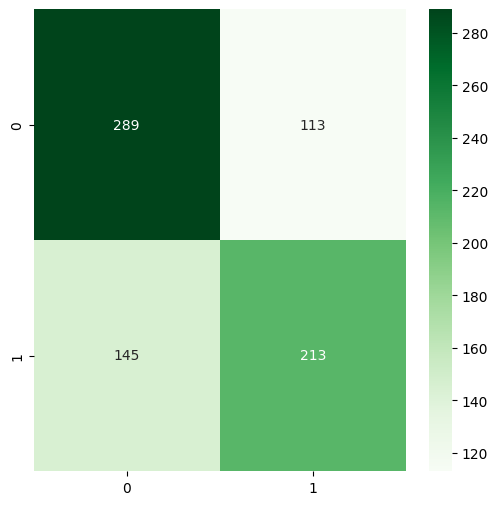

In [35]:
neigh2 = KNeighborsClassifier(n_neighbors=7)
neigh2.fit(X_train2,y_train2)
pred_knn2 = neigh2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_knn2))
print(classification_report(y_test2, pred_knn2))
print(round(np.sum([y_test2==pred_knn2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'KNN',round(np.sum([y_test2==pred_knn2])/len(y_test2),4)*100 ])

#### Adaboost

In [36]:
# for i in range(50,2001,50):
#     ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME", random_state=0)
#     ada.fit(X_train2,y_train2)
#     pred_ada = ada.predict(X_test2)
#     print(i,round(np.sum([y_test2==pred_ada])/len(y_test2),4)*100,"%")

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       402
           1       0.66      0.66      0.66       358

    accuracy                           0.68       760
   macro avg       0.68      0.68      0.68       760
weighted avg       0.68      0.68      0.68       760

68.03 %


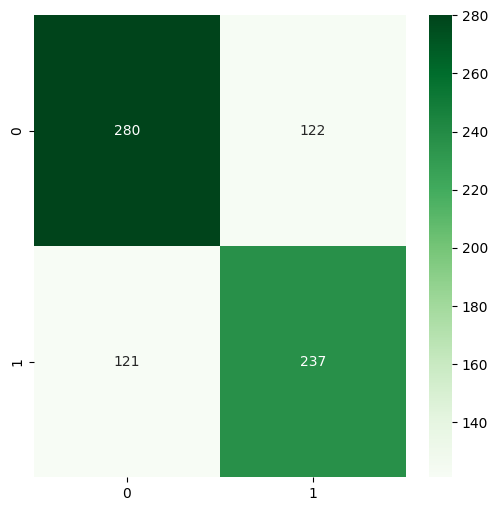

In [37]:
ada2 = AdaBoostClassifier(n_estimators=1200, algorithm="SAMME",random_state=0)
ada2.fit(X_train2,y_train2)
pred_ada2 = ada2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_ada2))
print(classification_report(y_test2, pred_ada2))
print(round(np.sum([y_test2==pred_ada2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Adaboost',round(np.sum([y_test2==pred_ada2])/len(y_test2),4)*100 ])

#### Random Forset

In [38]:
# for i in range(40,501,20):
#     for j in range(2,5):
#         RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
#         RF.fit(X_train2,y_train2)
#         pred_RF = RF.predict(X_test2)
#         print(i,j,round(np.sum([y_test2==pred_RF])/len(y_test2),4)*100,"%")

              precision    recall  f1-score   support

           0       0.72      0.77      0.74       402
           1       0.72      0.67      0.69       358

    accuracy                           0.72       760
   macro avg       0.72      0.72      0.72       760
weighted avg       0.72      0.72      0.72       760

72.11 %


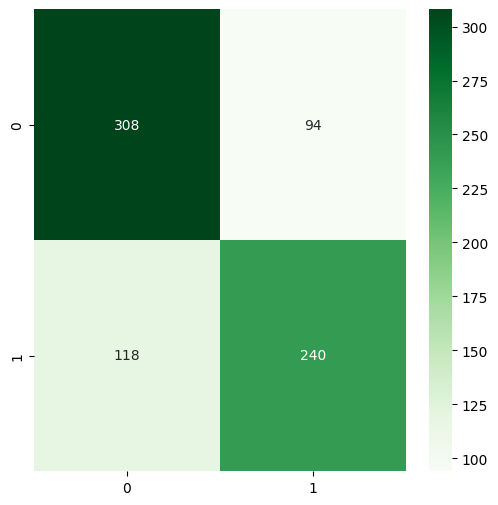

In [39]:
RF2 = RandomForestClassifier(n_estimators=300, max_depth=None,min_samples_split=2, random_state=0)
RF2.fit(X_train2,y_train2)
pred_RF2 = RF2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_RF2))
print(classification_report(y_test2, pred_RF2))
print(round(np.sum([y_test2==pred_RF2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Random Forest',round(np.sum([y_test2==pred_RF2])/len(y_test2),4)*100 ])

#### Logistic Regression

In [40]:
# penilties = ["l1","l2","elasticnet"]
# solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
# tols= [0.1 ,0.01]

# for i in penilties:
#     for j in solvers:
#         for k in tols:
#             try:
#                 LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000,random_state=0)
#                 LR.fit(X_train2,y_train2)
#                 pred_LR = LR.predict(X_test2)
#                 print(i,j,k,round(np.sum([y_test2==pred_LR])/len(y_test2),4)*100,"%")
#             except:
#                 pass
        

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       402
           1       0.64      0.63      0.64       358

    accuracy                           0.66       760
   macro avg       0.66      0.66      0.66       760
weighted avg       0.66      0.66      0.66       760

65.92 %


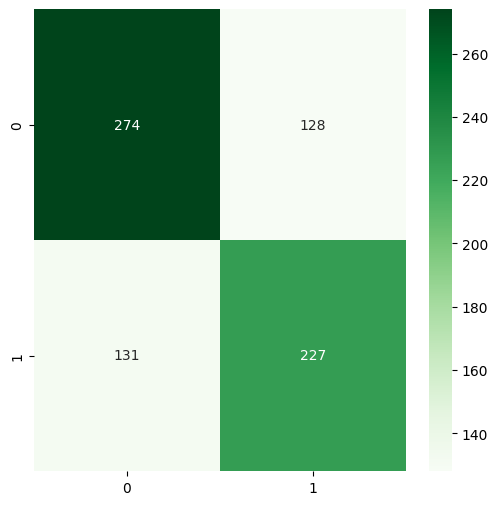

In [41]:
LR2 = LogisticRegression(penalty="l1", solver="saga", tol=0.1, max_iter=10000, random_state=0)
LR2.fit(X_train2,y_train2)
pred_LR2 = LR2.predict(X_test2)
Confusion_Matrix(confusion_matrix(y_test2,pred_LR2))
print(classification_report(y_test2, pred_LR2))
print(round(np.sum([y_test2==pred_LR2])/len(y_test2),4)*100,"%")
results.append(['histogram', 'Logistic Regression',round(np.sum([y_test2==pred_LR2])/len(y_test2),4)*100 ])

# RUN ON DATA SET IMAGE PCA

In [42]:
final = final_test_X.iloc[:, 4+256*3:4+256*3+200*200*3]
print(final.shape)
print(final.head())
print(X_train3.shape)

pca1=PCA(n_components=200)
X_train3=pca1.fit_transform(X_train3)
X_test3=pca1.transform(X_test3)
final_test_X3 = pca1.transform(final)

print(X_train3.shape)
print(X_test3.shape)
print(final_test_X3.shape)

cs = [i for i in range(200)]
df_X3_final_test = pd.DataFrame(final_test_X3,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X3_final_test['type']=cy
df_X3_final_test.head()

df_X3_final_test.to_csv('df_final_test_2class_X3.csv', index=False)

(632, 120000)
    i0   i1   i2   i3   i4   i5   i6   i7   i8   i9  ...  i119990  i119991  \
0  254  254  254  254  254  254  254  254  254  254  ...      255      255   
1   99   92  136   94   90  125   34   34   58    4  ...       98       33   
2  255  255  255  255  255  255  255  255  255  255  ...      255      255   
3  255  255  255  255  255  255  255  255  255  255  ...      255      255   
4  251  251  251  254  254  254  255  255  255  253  ...      255      253   

   i119992  i119993  i119994  i119995  i119996  i119997  i119998  i119999  
0      255      255      255      255      255      255      255      255  
1       47       99       33       49       96       33       49       96  
2      255      255      255      255      255      255      255      255  
3      255      255      255      255      255      255      255      255  
4      253      253      255      255      255      255      255      255  

[5 rows x 120000 columns]
(1771, 120000)
(1771, 200)
(760, 2

#### SVM

In [43]:
# losses = ["hinge","squared_hinge"]
# penalties = ["l1","l2"]

# print("OneVsOneClassifier")
# for i in losses:
#     for j in penalties:
#         try:
#             svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train3, y_train3)
#             pred_svm = svm.predict(X_test3)
#             print(i,j,round(np.sum([y_test3==pred_svm])/len(y_test3),4)*100,"%")
#         except:
#             pass


              precision    recall  f1-score   support

           0       0.55      0.55      0.55       402
           1       0.49      0.49      0.49       358

    accuracy                           0.52       760
   macro avg       0.52      0.52      0.52       760
weighted avg       0.52      0.52      0.52       760

52.11 %


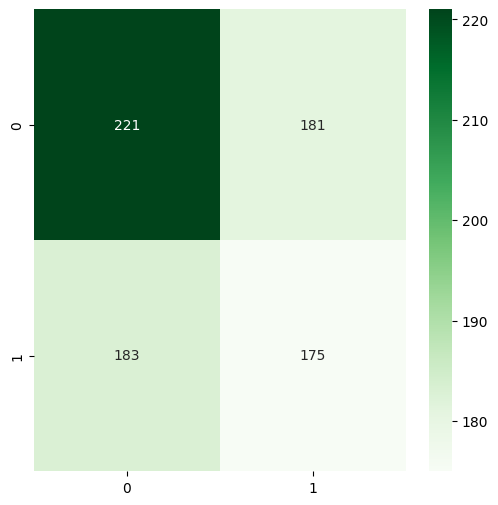

In [44]:
svm3 =  OneVsOneClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train3, y_train3)
pred_svm3 = svm3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_svm3))
print(classification_report(y_test3, pred_svm3))
print(round(np.sum([y_test3==pred_svm3])/len(y_test3),4)*100,"%")
results.append(['image pca 200', 'SVM',round(np.sum([y_test3==pred_svm3])/len(y_test3),4)*100 ])

#### KNN

In [45]:
# for i in range(1,101):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     neigh.fit(X_train3,y_train3)
#     pred_knn = neigh.predict(X_test3)
#     print(i,round(np.sum([y_test3==pred_knn])/len(y_test3),4)*100,"%")


              precision    recall  f1-score   support

           0       0.72      0.74      0.73       402
           1       0.70      0.68      0.69       358

    accuracy                           0.71       760
   macro avg       0.71      0.71      0.71       760
weighted avg       0.71      0.71      0.71       760

71.45 %


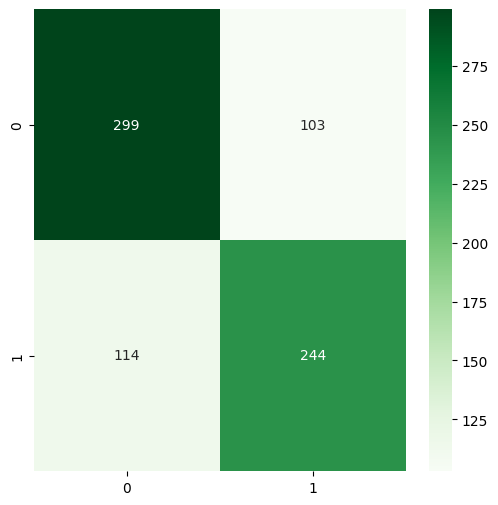

In [46]:
neigh3 = KNeighborsClassifier(n_neighbors=1)
neigh3.fit(X_train3,y_train3)
pred_knn3 = neigh3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_knn3))
print(classification_report(y_test3, pred_knn3))
print(round(np.sum([y_test3==pred_knn3])/len(y_test3),4)*100,"%")
results.append(['image pca 200', 'KNN',round(np.sum([y_test3==pred_knn3])/len(y_test3),4)*100 ])

#### ADABOOST

In [47]:
# for i in range(50,2001,50):
#     ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
#     ada.fit(X_train3,y_train3)
#     pred_ada = ada.predict(X_test3)
#     print(i,round(np.sum([y_test3==pred_ada])/len(y_test3),4)*100,"%")

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       402
           1       0.66      0.72      0.69       358

    accuracy                           0.69       760
   macro avg       0.69      0.69      0.69       760
weighted avg       0.70      0.69      0.69       760

69.21000000000001 %


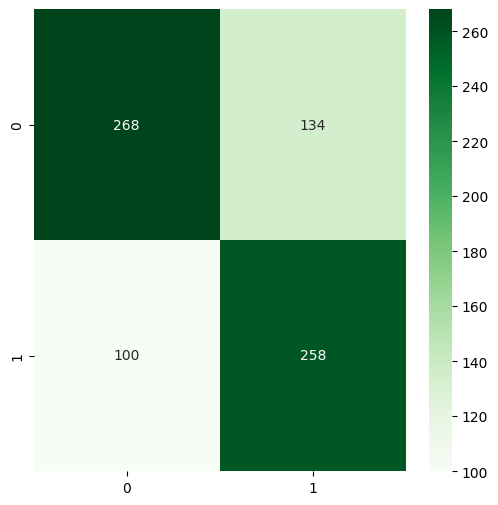

In [48]:
ada3 = AdaBoostClassifier(n_estimators=1900, algorithm="SAMME",random_state=0)
ada3.fit(X_train3,y_train3)
pred_ada3 = ada3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_ada3))
print(classification_report(y_test3, pred_ada3))
print(round(np.sum([y_test3==pred_ada3])/len(y_test3),4)*100,"%")
results.append(['image pca 200', 'Adaboost',round(np.sum([y_test3==pred_ada3])/len(y_test3),4)*100 ])

#### RANDOM FOREST

In [49]:
# for i in range(40,501,20):
#     for j in range(2,5):
#         RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
#         RF.fit(X_train3,y_train3)
#         pred_RF = RF.predict(X_test3)
#         print(i,j,round(np.sum([y_test3==pred_RF])/len(y_test3),4)*100,"%")

              precision    recall  f1-score   support

           0       0.71      0.85      0.77       402
           1       0.78      0.61      0.69       358

    accuracy                           0.74       760
   macro avg       0.75      0.73      0.73       760
weighted avg       0.75      0.74      0.73       760

73.82 %


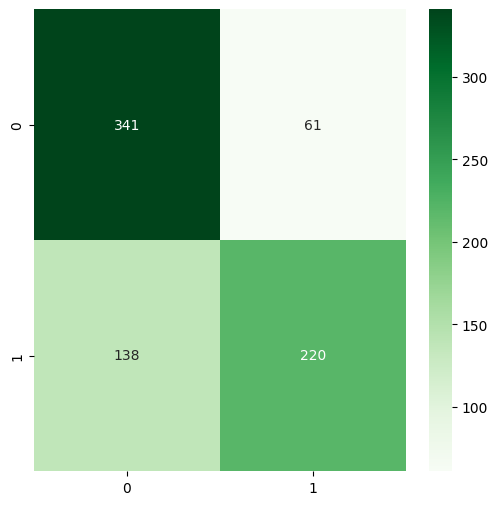

In [50]:
RF3 = RandomForestClassifier(n_estimators=340, max_depth=None,min_samples_split=3, random_state=0)
RF3.fit(X_train3,y_train3)
pred_RF3 = RF3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_RF3))
print(classification_report(y_test3, pred_RF3))
print(round(np.sum([y_test3==pred_RF3])/len(y_test3),4)*100,"%")
results.append(['image pca 200', 'Random Forest',round(np.sum([y_test3==pred_RF3])/len(y_test3),4)*100 ])

#### LOGISTIC REGRESSION

In [51]:
# penilties = ["l1","l2","elasticnet"]
# solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
# tols= [0.1 ,0.01, 0.001]

# for i in penilties:
#     for j in solvers:
#         for k in tols:
#             try:
#                 LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
#                 LR.fit(X_train3,y_train3)
#                 pred_LR = LR.predict(X_test3)
#                 print(i,j,k,round(np.sum([y_test3==pred_LR])/len(y_test3),4)*100,"%")
#             except:
#                 pass

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       402
           1       0.62      0.63      0.62       358

    accuracy                           0.64       760
   macro avg       0.64      0.64      0.64       760
weighted avg       0.64      0.64      0.64       760

64.08 %


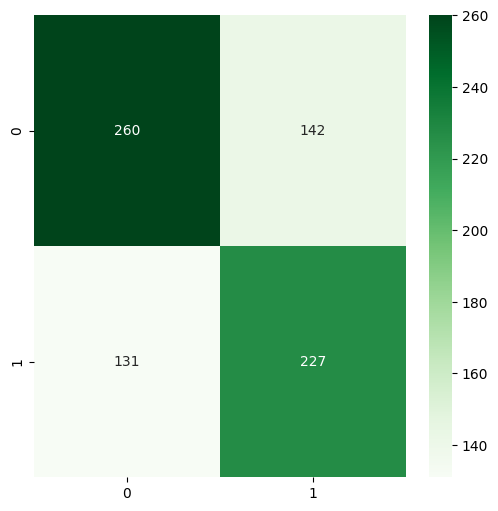

In [52]:
LR3 = LogisticRegression(penalty="l1", solver="saga", tol=0.1, max_iter=10000, random_state = 0)
LR3.fit(X_train3,y_train3)
pred_LR3 = LR3.predict(X_test3)
Confusion_Matrix(confusion_matrix(y_test3,pred_LR3))
print(classification_report(y_test3, pred_LR3))
print(round(np.sum([y_test3==pred_LR3])/len(y_test3),4)*100,"%")
results.append(['image pca 200',round(np.sum([y_test3==pred_LR3])/len(y_test3),4)*100 ])

# RUN ON EDGE PCA

In [53]:
final = final_test_X.iloc[: ,4+256*3+200*200*3:]
print(final.shape)
print(final.head())
print(X_train4.shape)

pca2=PCA(n_components=100)
X_train4=pca2.fit_transform(X_train4)
X_test4=pca2.transform(X_test4)
final_test_X4 = pca2.transform(final)

print(X_train4.shape)
print(X_test4.shape)
print(final_test_X4.shape)

cs = [i for i in range(100)]
df_X4_final_test = pd.DataFrame(final_test_X4,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X4_final_test['type']=cy
df_X4_final_test.head()

df_X4_final_test.to_csv('df_final_test_2class_X4.csv', index=False)

(632, 40000)
   e0  e1   e2  e3  e4  e5  e6  e7  e8  e9  ...  e39990  e39991  e39992  \
0   0   0    0   0   0   0   0   0   0   0  ...       0       0       0   
1   0   0  255   0   0   0   0   0   0   0  ...       0       0       0   
2   0   0    0   0   0   0   0   0   0   0  ...       0       0       0   
3   0   0    0   0   0   0   0   0   0   0  ...       0       0       0   
4   0   0    0   0   0   0   0   0   0   0  ...       0       0       0   

   e39993  e39994  e39995  e39996  e39997  e39998  e39999  
0       0       0       0       0       0       0       0  
1     255       0       0       0       0       0       0  
2       0       0       0       0       0       0       0  
3       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0  

[5 rows x 40000 columns]
(1771, 40000)
(1771, 100)
(760, 100)
(632, 100)


#### SVM

In [54]:
# losses = ["hinge","squared_hinge"]
# penalties = ["l1","l2"]

# print("OneVsOneClassifier")
# for i in losses:
#     for j in penalties:
#         try:
#             svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train4, y_train4)
#             pred_svm = svm.predict(X_test4)
#             print(i,j,round(np.sum([y_test4==pred_svm])/len(y_test4),4)*100,"%")
#         except:
#             pass


              precision    recall  f1-score   support

           0       0.64      0.57      0.60       402
           1       0.57      0.63      0.60       358

    accuracy                           0.60       760
   macro avg       0.60      0.60      0.60       760
weighted avg       0.61      0.60      0.60       760

60.260000000000005 %


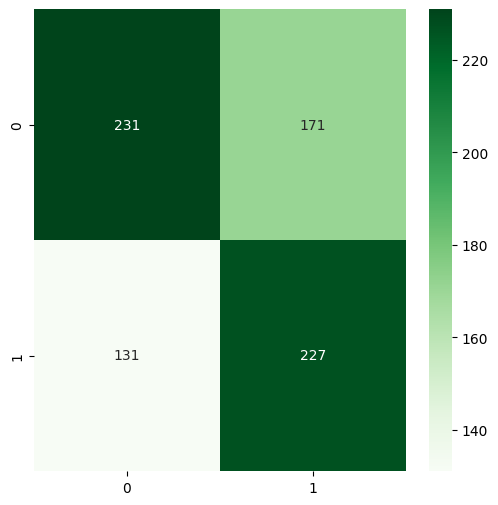

In [55]:
svm4 =  OneVsRestClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train4, y_train4)
pred_svm4 = svm4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_svm4))
print(classification_report(y_test4, pred_svm4))
print(round(np.sum([y_test4==pred_svm4])/len(y_test4),4)*100,"%")
results.append(['edge pca 100', 'SVM',round(np.sum([y_test4==pred_svm4])/len(y_test4),4)*100 ])

#### KNN

In [56]:
# for i in range(1,51):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     neigh.fit(X_train4,y_train4)
#     pred_knn = neigh.predict(X_test4)
#     print(i,round(np.sum([y_test4==pred_knn])/len(y_test4),4)*100,"%")

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       402
           1       0.69      0.76      0.73       358

    accuracy                           0.73       760
   macro avg       0.73      0.73      0.73       760
weighted avg       0.73      0.73      0.73       760

72.89 %


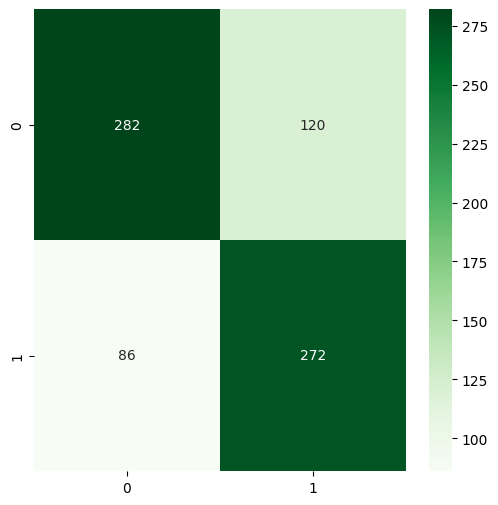

In [57]:
neigh4 = KNeighborsClassifier(n_neighbors=1)
neigh4.fit(X_train4,y_train4)
pred_knn4 = neigh4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_knn4))
print(classification_report(y_test4, pred_knn4))
print(round(np.sum([y_test4==pred_knn4])/len(y_test4),4)*100,"%")
results.append(['edge pca 100', 'KNN',round(np.sum([y_test4==pred_knn4])/len(y_test4),4)*100 ])

#### Adaboost

In [58]:
# for i in range(50,2001,50):
#     ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
#     ada.fit(X_train4,y_train4)
#     pred_ada = ada.predict(X_test4)
#     print(i,round(np.sum([y_test4==pred_ada])/len(y_test4),4)*100,"%")

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       402
           1       0.65      0.78      0.71       358

    accuracy                           0.69       760
   macro avg       0.70      0.70      0.69       760
weighted avg       0.71      0.69      0.69       760

69.47 %


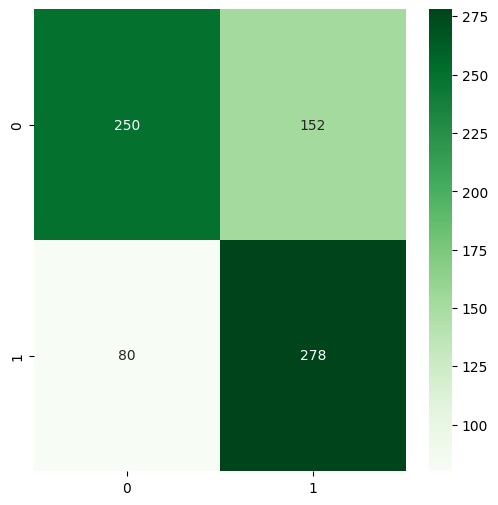

In [59]:
ada4 = AdaBoostClassifier(n_estimators=1350, algorithm="SAMME",random_state=0)
ada4.fit(X_train4,y_train4)
pred_ada4 = ada4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_ada4))
print(classification_report(y_test4, pred_ada4))
print(round(np.sum([y_test4==pred_ada4])/len(y_test4),4)*100,"%")
results.append(['edge pca 100', 'Adaboost',round(np.sum([y_test4==pred_ada4])/len(y_test4),4)*100 ])

#### Random Forest

In [60]:
# for i in range(40,501,20):
#     for j in range(2,5):
#         RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
#         RF.fit(X_train4,y_train4)
#         pred_RF = RF.predict(X_test4)
#         print(i,j,round(np.sum([y_test4==pred_RF])/len(y_test4),4)*100,"%")

              precision    recall  f1-score   support

           0       0.76      0.59      0.67       402
           1       0.63      0.78      0.70       358

    accuracy                           0.68       760
   macro avg       0.69      0.69      0.68       760
weighted avg       0.70      0.68      0.68       760

68.42 %


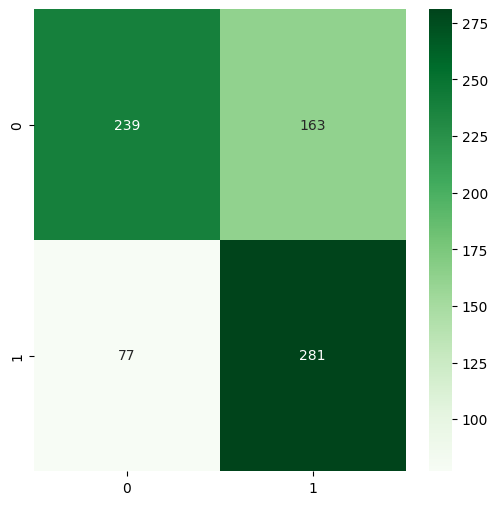

In [61]:
RF4 = RandomForestClassifier(n_estimators=40, max_depth=None,min_samples_split=2, random_state=0)
RF4.fit(X_train4,y_train4)
pred_RF4 = RF4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_RF4))
print(classification_report(y_test4, pred_RF4))
print(round(np.sum([y_test4==pred_RF4])/len(y_test4),4)*100,"%")
results.append(['edge pca 100', 'Random Forest',round(np.sum([y_test4==pred_RF4])/len(y_test4),4)*100 ])

#### Logistic Regression

In [62]:
# penilties = ["l1","l2","elasticnet"]
# solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
# tols= [0.1 ,0.01, 0.001]

# for i in penilties:
#     for j in solvers:
#         for k in tols:
#             try:
#                 LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
#                 LR.fit(X_train4,y_train4)
#                 pred_LR = LR.predict(X_test4)
#                 print(i,j,k,round(np.sum([y_test4==pred_LR])/len(y_test4),4)*100,"%")
#             except:
#                 pass

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       402
           1       0.62      0.62      0.62       358

    accuracy                           0.64       760
   macro avg       0.64      0.64      0.64       760
weighted avg       0.64      0.64      0.64       760

63.949999999999996 %


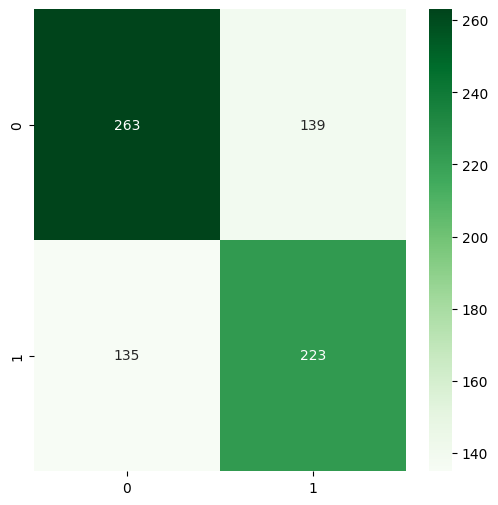

In [63]:
LR4 = LogisticRegression(penalty="l2", solver="lbfgs", tol=0.1, max_iter=10000, random_state = 0)
LR4.fit(X_train4,y_train4)
pred_LR4 = LR4.predict(X_test4)
Confusion_Matrix(confusion_matrix(y_test4,pred_LR4))
print(classification_report(y_test4, pred_LR4))
print(round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100,"%")
results.append(['edge pca 100', 'Logistic Regression',round(np.sum([y_test4==pred_LR4])/len(y_test4),4)*100 ])

all pca 

In [64]:

pca3=PCA(n_components=200)
X_train5=pca3.fit_transform(X_train5)
X_test5=pca3.transform(X_test5)
final_test_X5 = pca3.transform(final_test_X)

print(X_train5.shape)
print(X_test5.shape)
print(final_test_X5.shape)

cs = [i for i in range(200)]
df_X5_final_test = pd.DataFrame(final_test_X5,columns=cs)
cy =[]
for i in final_test_y:
    cy.append(i)
df_X5_final_test['type']=cy
df_X5_final_test.head()

df_X5_final_test.to_csv('df_final_test_2class_X5.csv', index=False)

(1771, 200)
(760, 200)
(632, 200)


svm

In [65]:
# losses = ["hinge","squared_hinge"]
# penalties = ["l1","l2"]

# print("OneVsOneClassifier")
# for i in losses:
#     for j in penalties:
#         try:
#             svm =  OneVsOneClassifier(LinearSVC(random_state=0, loss=i,penalty=j,)).fit(X_train5, y_train5)
#             pred_svm = svm.predict(X_test5)
#             print(i,j,round(np.sum([y_test5==pred_svm])/len(y_test5),4)*100,"%")
#         except:
#             pass


              precision    recall  f1-score   support

           0       0.67      0.65      0.66       402
           1       0.62      0.63      0.63       358

    accuracy                           0.64       760
   macro avg       0.64      0.64      0.64       760
weighted avg       0.65      0.64      0.64       760

64.47 %


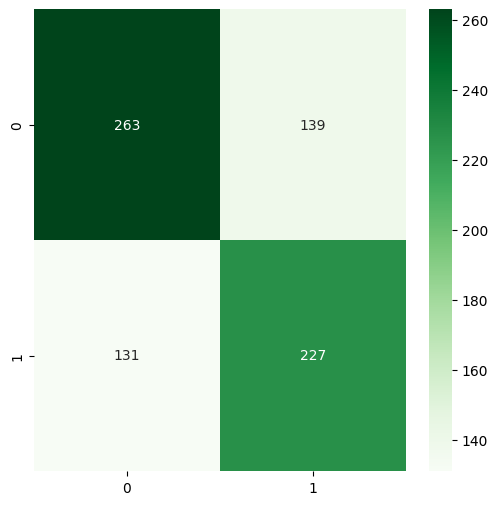

In [66]:
svm5 =  OneVsRestClassifier(LinearSVC(random_state=0, loss="hinge",penalty="l2")).fit(X_train5, y_train5)
pred_svm5 = svm5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_svm5))
print(classification_report(y_test5, pred_svm5))
print(round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100,"%")
results.append(['all pca 200', 'SVM',round(np.sum([y_test5==pred_svm5])/len(y_test5),4)*100 ])

knn

In [67]:
# for i in range(1,51):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     neigh.fit(X_train5,y_train5)
#     pred_knn = neigh.predict(X_test5)
#     print(i,round(np.sum([y_test5==pred_knn])/len(y_test5),4)*100,"%")

              precision    recall  f1-score   support

           0       0.73      0.76      0.75       402
           1       0.72      0.68      0.70       358

    accuracy                           0.73       760
   macro avg       0.72      0.72      0.72       760
weighted avg       0.72      0.72      0.72       760

72.5 %


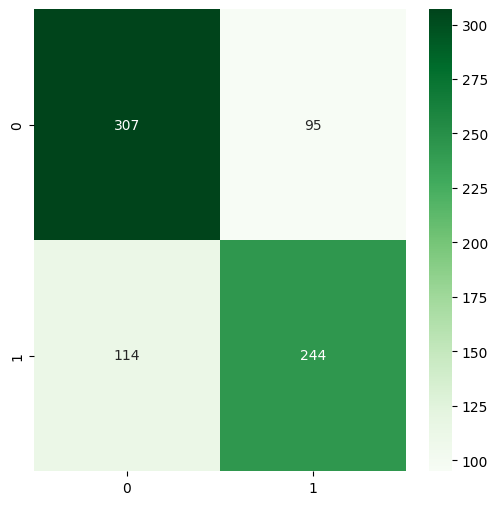

In [68]:
neigh5 = KNeighborsClassifier(n_neighbors=1)
neigh5.fit(X_train5,y_train5)
pred_knn5 = neigh5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_knn5))
print(classification_report(y_test5, pred_knn5))
print(round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100,"%")
results.append(['all pca 200', 'KNN',round(np.sum([y_test5==pred_knn5])/len(y_test5),4)*100 ])

adaboost

In [69]:
# for i in range(50,2001,50):
#     ada = AdaBoostClassifier(n_estimators=i, algorithm="SAMME",random_state=0)
#     ada.fit(X_train5,y_train5)
#     pred_ada = ada.predict(X_test5)
#     print(i,round(np.sum([y_test5==pred_ada])/len(y_test5),4)*100,"%")

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       402
           1       0.68      0.69      0.68       358

    accuracy                           0.70       760
   macro avg       0.70      0.70      0.70       760
weighted avg       0.70      0.70      0.70       760

69.74000000000001 %


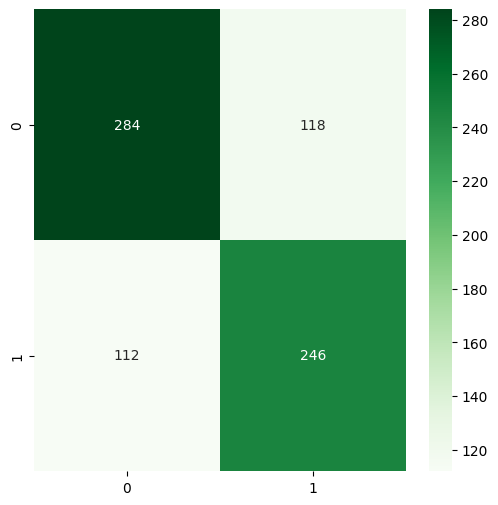

In [70]:
ada5 = AdaBoostClassifier(n_estimators=700, algorithm="SAMME",random_state=0)
ada5.fit(X_train5,y_train5)
pred_ada5 = ada5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_ada5))
print(classification_report(y_test5, pred_ada5))
print(round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100,"%")
results.append(['all pca 200', 'Adaboost',round(np.sum([y_test5==pred_ada5])/len(y_test5),4)*100 ])

random forest

In [71]:
# for i in range(40,501,20):
#     for j in range(2,5):
#         RF = RandomForestClassifier(n_estimators=i, max_depth=None,min_samples_split=j, random_state=0)
#         RF.fit(X_train5,y_train5)
#         pred_RF = RF.predict(X_test5)
#         print(i,j,round(np.sum([y_test5==pred_RF])/len(y_test5),4)*100,"%")

              precision    recall  f1-score   support

           0       0.74      0.79      0.76       402
           1       0.75      0.68      0.71       358

    accuracy                           0.74       760
   macro avg       0.74      0.74      0.74       760
weighted avg       0.74      0.74      0.74       760

74.08 %


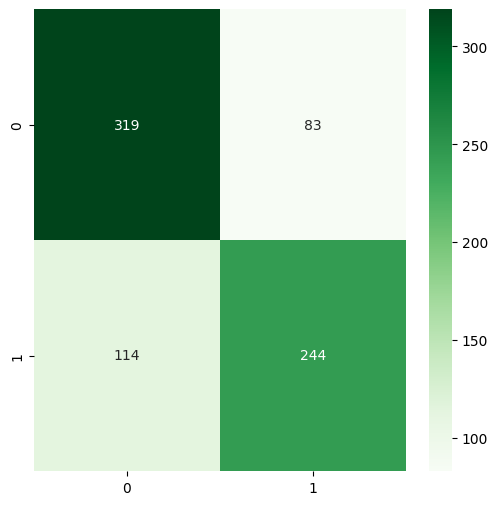

In [72]:
RF5 = RandomForestClassifier(n_estimators=360, max_depth=None,min_samples_split=4, random_state=0)
RF5.fit(X_train5,y_train5)
pred_RF5 = RF5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_RF5))
print(classification_report(y_test5, pred_RF5))
print(round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100,"%")
results.append(['all pca 200', 'Random Forest',round(np.sum([y_test5==pred_RF5])/len(y_test5),4)*100 ])

logistic regression

In [73]:
# penilties = ["l1","l2","elasticnet"]
# solvers = ["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]
# tols= [0.1 ,0.01, 0.001]

# for i in penilties:
#     for j in solvers:
#         for k in tols:
#             try:
#                 LR = LogisticRegression(penalty=i, solver=j, tol=k, max_iter=10000, random_state =0)
#                 LR.fit(X_train5,y_train5)
#                 pred_LR = LR.predict(X_test5)
#                 print(i,j,k,round(np.sum([y_test5==pred_LR])/len(y_test5),4)*100,"%")
#             except:
#                 pass

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       402
           1       0.66      0.66      0.66       358

    accuracy                           0.68       760
   macro avg       0.68      0.68      0.68       760
weighted avg       0.68      0.68      0.68       760

68.03 %


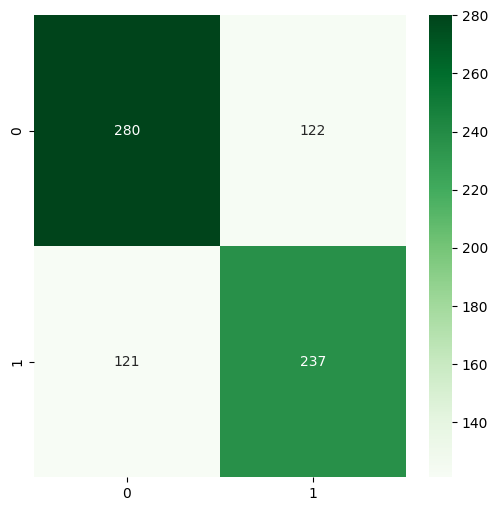

In [74]:
LR5 = LogisticRegression(penalty="l1", solver="liblinear", tol=0.01, max_iter=10000, random_state = 0)
LR5.fit(X_train5,y_train5)
pred_LR5 = LR5.predict(X_test5)
Confusion_Matrix(confusion_matrix(y_test5,pred_LR5))
print(classification_report(y_test5, pred_LR5))
print(round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100,"%")
results.append(['all pca 200', 'Logistic Regression',round(np.sum([y_test5==pred_LR5])/len(y_test5),4)*100 ])

In [75]:
cols = ["df_type","classifier","accuracy"]
df = pd.DataFrame(results, columns=cols)

In [76]:
df

,df_type,classifier,accuracy
0,lines and circles,SVM,60.66
1,lines and circles,KNN,62.24
2,lines and circles,Adaboost,63.95
3,lines and circles,Random Forest,60.39
4,lines and circles,Logistic Regression,63.55
5,histogram,SVM,56.97
6,histogram,KNN,66.05
7,histogram,Adaboost,68.03
8,histogram,Random Forest,72.11
9,histogram,Logistic Regression,65.92


In [77]:

filenames = ['svm1_2class.sav','svm2_2class.sav','svm3_2class.sav','svm4_2class.sav','svm5_2class.sav',
             'knn1_2class.sav','knn2_2class.sav','knn3_2class.sav','knn4_2class.sav','knn5_2class.sav',
             'ada1_2class.sav','ada2_2class.sav','ada3_2class.sav','ada4_2class.sav','ada5_2class.sav',
             'RF1_2class.sav','RF2_2class.sav','RF3_2class.sav','RF4_2class.sav','RF5_2class.sav',
             'LR1_2class.sav','LR2_2class.sav','LR3_2class.sav','LR4_2class.sav','LR5_2class.sav']
models= [svm1,svm2,svm3,svm4,svm5,
         neigh1,neigh2,neigh3,neigh4,neigh5,
         ada1,ada2,ada3,ada4,ada5,
         RF1,RF2,RF3,RF4,RF5,
         LR1,LR2,LR3,LR4,LR5]

for i in range(len(filenames)): 
    pickle.dump(models[i], open(filenames[i], 'wb'))